<a href="https://colab.research.google.com/github/tamaraporf/MLP-application-in-oil-pipeline-interruptions/blob/main/Model_MLP2_Otimized(test_CM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
%%time
#base = pd.read_csv(r'C:\Users\tamar\Documents\Modelos RNA(Tese)\Modelo DRNN\dadoraiz.csv')
base = pd.read_csv(r'dadoraiz.csv')

base.head()
#Documents/ModelosRNA(Tese)/ModeloDRNN/dadoraiz.csv

In [ ]:
x = base.iloc[:, 2:135].values
y = base.iloc[:, [0,1]].values
print(x)
print(y)

[[2.15345994e-04 1.43619996e-08 1.68670002e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.14461004e-04 1.40280001e-08 1.68670002e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.13602994e-04 1.36939997e-08 1.66999996e-08 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.00737998e-05 7.18099979e-09 7.68199993e-09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00496000e-05 7.01400005e-09 7.51500018e-09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.00226998e-05 7.01400005e-09 7.68199993e-09 ...            nan
             nan            nan]]
[[ 0.    0.5 ]
 [ 0.    0.51]
 [ 0.    0.52]
 ...
 [90.    4.94]
 [90.    4.95]
 [90.    4.96]]


In [ ]:
#pré-processamento dos dados
#transformação dos atributos numéricos em atributos do tipo dummy
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelenconder = LabelEncoder()
y[:, 0] = labelenconder.fit_transform(y[:, 0])

onehotencoder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],
                                  remainder='passthrough')

y = onehotencoder.fit_transform(y)

x= np.asarray(x).astype(np.float32)
y= np.asarray(y).astype(np.float32)

#normalizando dados

from sklearn.preprocessing import StandardScaler, MinMaxScaler
#norm_dados = StandardScaler()
norm_dados = MinMaxScaler(feature_range = (0, 1))
x_norm = norm_dados.fit_transform(x)
x_norm


#salvar arquivos para matriz de confusão

#y_cm = pd.DataFrame(y)
#y_cm.to_excel('y_cm.xlsx') 

array([[1.        , 0.9268292 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.99586844, 0.902439  , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.9918628 , 0.8780487 , 0.9895833 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04168068, 0.402439  , 0.4270833 , ..., 0.        , 0.        ,
        0.        ],
       [0.0415677 , 0.3902439 , 0.41666666, ..., 0.        , 0.        ,
        0.        ],
       [0.04144212, 0.3902439 , 0.4270833 , ...,        nan,        nan,
               nan]], dtype=float32)

In [ ]:
y

array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.5 ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.51],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.52],
       ...,
       [1.  , 0.  , 0.  , 0.  , 1.  , 4.94],
       [1.  , 0.  , 0.  , 0.  , 1.  , 4.95],
       [1.  , 0.  , 0.  , 0.  , 1.  , 4.96]], dtype=float32)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import random

import IPython.display as display
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
def criar_rede():
    regressor = Sequential()
    regressor.add(Dense(units = 300, activation = 'sigmoid', kernel_initializer = 'normal', input_dim = 133))
    regressor.add(Dense(units = 300, activation = 'sigmoid', kernel_initializer = 'normal'))
    regressor.add(Dense(units = 300, activation = 'sigmoid', kernel_initializer = 'normal'))
    regressor.add(Dense(units = 300, activation = 'sigmoid', kernel_initializer = 'normal'))
    regressor.add(Dense(units = 5, activation = 'linear'))
    regressor.compile(loss='mse', optimizer='sgd', metrics=['mse'])
    return regressor

In [ ]:
gpu_name = tf.test.gpu_device_name()
if gpu_name != '/device:GPU:0':
  raise SystemError('no GPUs')
print('GPUs found: {}'.format(gpu_name))

GPUs found: /device:GPU:0


In [ ]:
from sklearn.model_selection import train_test_split, KFold, StratifiedShuffleSplit
import random

In [ ]:
seed = 1632
np.random.seed(seed)
print(seed)

1632


In [ ]:
kfold_num = 10
#kf = KFold(kfold_num, shuffle=True) # Use for KFold classification
kf = StratifiedShuffleSplit(kfold_num, test_size=0.22, random_state=seed)
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []
list_model = []
fold = 0


for train, test in kf.split(x_norm, y[:,1]):
    fold+=1
    kfold_name = 'kfold_'+str(fold)
    print(f"Fold #{fold}")
    
    x_train = x_norm[train]
    x_test = x_norm[test]

    y_train = y[train]
    y_test = y[test]
    
    print("Formato Dados X_train:,", x_train.shape)
    print("Formato Dados y_train:", y_train.shape)

    print("Formato Dados X_test:", x_test.shape)
    print("Formato Dados y_test:", y_test.shape) 
    

    
    list_x_train.append(x_train)
    list_x_test.append(x_test)
    list_y_train.append(y_train)
    list_y_test.append(y_test)
    #list_model.append(model)

Fold #1
Formato Dados X_train:, (4059, 133)
Formato Dados y_train: (4059, 5)
Formato Dados X_test: (1145, 133)
Formato Dados y_test: (1145, 5)
Fold #2
Formato Dados X_train:, (4059, 133)
Formato Dados y_train: (4059, 5)
Formato Dados X_test: (1145, 133)
Formato Dados y_test: (1145, 5)
Fold #3
Formato Dados X_train:, (4059, 133)
Formato Dados y_train: (4059, 5)
Formato Dados X_test: (1145, 133)
Formato Dados y_test: (1145, 5)
Fold #4
Formato Dados X_train:, (4059, 133)
Formato Dados y_train: (4059, 5)
Formato Dados X_test: (1145, 133)
Formato Dados y_test: (1145, 5)
Fold #5
Formato Dados X_train:, (4059, 133)
Formato Dados y_train: (4059, 5)
Formato Dados X_test: (1145, 133)
Formato Dados y_test: (1145, 5)
Fold #6
Formato Dados X_train:, (4059, 133)
Formato Dados y_train: (4059, 5)
Formato Dados X_test: (1145, 133)
Formato Dados y_test: (1145, 5)
Fold #7
Formato Dados X_train:, (4059, 133)
Formato Dados y_train: (4059, 5)
Formato Dados X_test: (1145, 133)
Formato Dados y_test: (1145, 5)

In [ ]:
zero = y_test[:, 0]>0.5
trinta = y_test[:, 1]>0.5
sessenta = y_test[:, 2]>0.5
noventa = y_test[:, 3]>0.5
degree0 = zero*1
degree30 = trinta*1
degree60 = sessenta*1
degree90 = noventa*1
degree1 = degree0.sum()
degree2 = degree30.sum()
degree3 = degree60.sum()
degree4 = degree90.sum()

print("Padrões para 0°:", degree1)
print("Padrões para 30°:", degree2)
print("Padrões para 60°:", degree3)
print("Padrões para 90°:", degree4)

#y_test = pd.DataFrame(y_test)
#y_test.to_excel('y_test.xlsx')

Padrões para 0°: 285
Padrões para 30°: 286
Padrões para 60°: 282
Padrões para 90°: 292


In [ ]:
epocas = 10000

regressor = KerasRegressor(build_fn = criar_rede,
                                epochs = epocas,
                                batch_size = 32)
# fit model
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#Salvar o Modelo a Cada Melhora da Métrica Monitorada (monitor='val_mae')
#callback_checkpoint = ModelCheckpoint(filepath="regressor.hdf5",
 #                                         monitor='val_mae', 
  #                                        mode='min',
   #                                       save_weights_only=False,
    #                                      save_best_only=True,
     #                                     verbose=1)

#Parar o Treinamento Após Certo Numero de Epócas (patience=1000), Caso não Haja Melhora na Métrica Monitorada (monitor='val_mae')
#es = EarlyStopping(monitor='val_mae', mode='min', verbose=1, patience=1000)
#callbacks = [callback_checkpoint, es]

import timeit
def train_gpu():
  with tf.device('/device:GPU:0'):
    regressor_history = regressor.fit(x_train, y_train,
                        #x_test, y_test,
                        validation_data=(x_test, y_test),
                        #callbacks=callbacks,
                        batch_size=32, 
                        epochs = 10000)
  return regressor_history
regressor_history = train_gpu()


A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 2437/10000
127/127 [==============================] - 0s 4ms/step - loss: 0.0903 - mse: 0.0903 - val_loss: 0.0876 - val_mse: 0.0876
Epoch 2438/10000
127/127 [==============================] - 0s 4ms/step - loss: 0.0868 - mse: 0.0868 - val_loss: 0.0878 - val_mse: 0.0878
Epoch 2439/10000
127/127 [==============================] - 0s 4ms/step - loss: 0.0903 - mse: 0.0903 - val_loss: 0.0989 - val_mse: 0.0989
Epoch 2440/10000
127/127 [==============================] - 0s 4ms/step - loss: 0.0898 - mse: 0.0898 - val_loss: 0.0897 - val_mse: 0.0897
Epoch 2441/10000
127/127 [==============================] - 0s 4ms/step - loss: 0.0882 - mse: 0.0882 - val_loss: 0.0954 - val_mse: 0.0954
Epoch 2442/10000
127/127 [==============================] - 0s 4ms/step - loss: 0.0906 - mse: 0.0906 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 2443/10000
127/127 [==============================] - 0s 4ms/step - loss: 0.0858 - mse: 0.0858 - val_loss: 

In [ ]:
result_train = regressor.predict(x_train)     
result_test = regressor.predict(x_test)

In [ ]:
# métricas para conjunto de treinamento e teste
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error, accuracy_score, classification_report, confusion_matrix
from math import sqrt

In [ ]:
def metrics_regression_eval(model, X, y):
        df = pd.DataFrame(columns=["Mean Absolute Error",
                                   "Mean Squared Error",
                                   "Root Mean Squared Error",
                                   "Mean Relative Error",
                                   "R2 Score",
                                   "Max Absolute Error",
                                   "Max Relative Error"])

        from math import sqrt
        y_pred = model.predict(X)
        y = y[:,-1]
        y_pred = y_pred[:, -1]
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = sqrt(mse)
        r2 = r2_score(y, y_pred)
        me = max_error(y, y_pred)

        absolute_deviation_vec = np.zeros(y.shape[0])
        absolute_percent_deviation_vec = np.zeros(y.shape[0])
    
        for i in range(0, y_pred.shape[0]):
            absolute_deviation_vec[i] = abs(y[i] - y_pred[i])
            absolute_percent_deviation_vec[i] = (absolute_deviation_vec[i]/y[i])*100 
        mrl= np.amax(absolute_percent_deviation_vec)
        rpe = np.mean(absolute_percent_deviation_vec)
        
        print("Mean Absolute Error:", mae)
        print("Mean Squared Error:", mse)
        print("Root Mean Squared Error:", rmse)
        print("Mean Relative Error:", rpe)
        print("R2 Score:", r2)
        print("Max Absolue Error:", me)
        print("Max Relative Error:", mrl)
        print('')

In [ ]:
metrics_regression_eval(regressor, x_train, y_train)


Mean Absolute Error: 0.15038362
Mean Squared Error: 0.04791151
Root Mean Squared Error: 0.2188869796755459
Mean Relative Error: 2.7470110886790584
R2 Score: 0.9965966551369431
Max Absolue Error: 1.5087214
Max Relative Error: 34.12431425439263



In [ ]:
metrics_regression_eval(regressor, x_test, y_test)

Mean Absolute Error: 0.15479499
Mean Squared Error: 0.05811162
Root Mean Squared Error: 0.24106351694995815
Mean Relative Error: 2.8160953599806025
R2 Score: 0.9959079765763953
Max Absolue Error: 2.7072353
Max Relative Error: 35.698866844177246



In [ ]:
dadosreais = pd.DataFrame(y_train)
dadospreditos = pd.DataFrame(result_train)
print(dadosreais)
print(dadospreditos)
dadosreais.to_excel('dadosreais_train_CM.xlsx')
dadospreditos.to_excel('dadospreditos_train_CM.xlsx') 

        0    1    2    3      4
0     0.0  0.0  0.0  1.0   9.41
1     0.0  1.0  0.0  0.0  10.36
2     0.0  1.0  0.0  0.0   9.37
3     1.0  0.0  0.0  0.0   1.25
4     0.0  0.0  1.0  0.0   9.56
...   ...  ...  ...  ...    ...
4054  1.0  0.0  0.0  0.0   9.51
4055  0.0  0.0  0.0  1.0  10.74
4056  0.0  0.0  1.0  0.0   9.12
4057  0.0  1.0  0.0  0.0   4.61
4058  0.0  1.0  0.0  0.0   2.63

[4059 rows x 5 columns]
             0         1         2         3          4
0    -0.059008 -0.031201  0.006473  1.082832   9.576408
1     0.008615  0.953550  0.000582  0.037496  10.459801
2    -0.010898  0.998301  0.020558 -0.005424   9.518346
3     1.007101  0.004912 -0.028470  0.017613   1.247181
4    -0.019628 -0.016511  1.050201 -0.015366  10.048517
...        ...       ...       ...       ...        ...
4054  0.992550 -0.017542  0.023988 -0.000921   9.395619
4055  0.022782 -0.016673  0.031416  0.960803  10.677237
4056 -0.014967  0.029984  1.008536 -0.024989   8.769454
4057 -0.029743  0.960377 -0.018

In [ ]:
dadosreais = pd.DataFrame(y_test)
dadospreditos = pd.DataFrame(result_test)
print(dadosreais)
print(dadospreditos)
dadosreais.to_excel('dadosreais_test_CM.xlsx')
dadospreditos.to_excel('dadospreditos_test_CM.xlsx') 

        0    1    2    3      4
0     1.0  0.0  0.0  0.0  13.38
1     0.0  1.0  0.0  0.0  13.49
2     0.0  1.0  0.0  0.0  10.85
3     0.0  0.0  1.0  0.0   2.32
4     0.0  0.0  0.0  1.0   6.42
...   ...  ...  ...  ...    ...
1140  0.0  0.0  0.0  1.0   6.73
1141  0.0  1.0  0.0  0.0   6.12
1142  0.0  0.0  0.0  1.0   3.75
1143  0.0  0.0  0.0  1.0  13.18
1144  0.0  0.0  1.0  0.0  11.42

[1145 rows x 5 columns]
             0         1         2         3          4
0     1.035298  0.002543 -0.033798  0.003728  13.324202
1     0.035815  0.953426 -0.001601  0.012923  13.167181
2     0.019812  0.992511 -0.015068  0.002507  11.659023
3    -0.020092  0.196613  0.685259  0.139914   2.445536
4     0.023783 -0.015868  0.022469  0.968746   6.377931
...        ...       ...       ...       ...        ...
1140  0.039215 -0.021016  0.008631  0.972122   6.705906
1141 -0.048848  0.888395  0.026918  0.137255   5.984670
1142 -0.031322 -0.058901  0.035282  1.054691   3.854463
1143 -0.102727  0.003007  0.041

In [ ]:
# fit model
history = regressor_history
# Get values for plot
history_dict = regressor_history.history
history_dict.keys()
loss_values = history_dict['loss'] 
epoch_num = [i for i in range(1, 10001)]

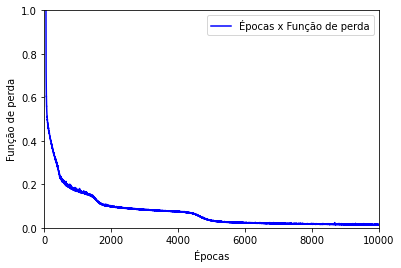

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epoch_num, loss_values, 'b', label='Épocas x Função de perda')
plt.title('')
plt.xlabel('Épocas')
plt.axis([0,epocas,0,1])
plt.ylabel('Função de perda')
plt.legend()
plt.show()

In [ ]:
dadospreditos_c = dadospreditos > 0.5
dadospreditos_c = dadospreditos_c*1
dadospreditos_c

#dadospreditos_c.to_excel('dadospreditos_c.xlsx') 

,0,1,2,3,4
0,1,0,0,0,1
1,0,1,0,0,1
2,0,1,0,0,1
3,0,0,1,0,1
4,0,0,0,1,1
...,...,...,...,...,...
1140,0,0,0,1,1
1141,0,1,0,0,1
1142,0,0,0,1,1
1143,0,0,0,1,1


In [ ]:
#dados reais usados para o teste
y_test[:, :4]
Y = y_test[:, :4]
Y

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
#dados preditos 
X = dadospreditos_c.iloc[:, :4].values
X= np.asarray(X).astype(np.float32)
X
#X.to_excel('X.xlsx') 

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]], dtype=float32)

In [ ]:
cm = confusion_matrix(Y.argmax(axis=1), X.argmax(axis=1))
cm

array([[285,   0,   0,   0],
       [  0, 286,   0,   0],
       [  0,   0, 282,   0],
       [  1,   0,   1, 290]])

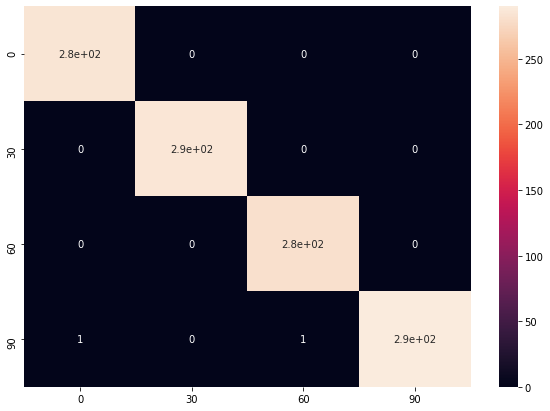

In [ ]:
CATEGORIES = ["0", "30", "60", "90"]
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [i for i in CATEGORIES],
                  columns = [i for i in CATEGORIES])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)